# EDA

In [1]:
# IMPORT NECESSARY LIBRARIES
import librosa
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
from IPython.display import Audio
import numpy as np
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook
import os # interface with underlying OS that python is running on
import sys
import scipy
import warnings
# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization, Dense
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report

## Male Neutral

In [3]:
# LOAD IN FILE
x, sr = librosa.load(r'C:\Users\mahan\Desktop\Code\RAVDEES\Actor_01\03-01-01-01-01-01-01.wav')

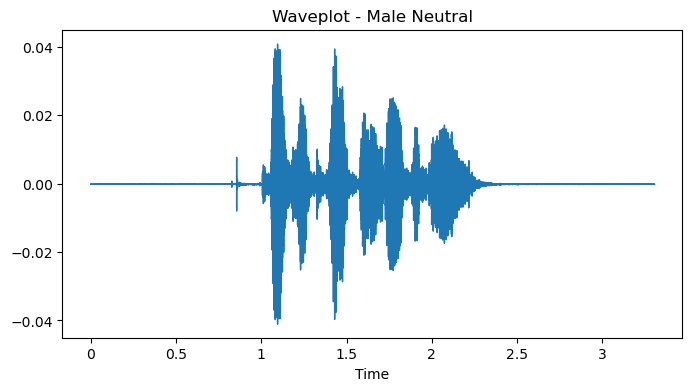

In [4]:
# DISPLAY WAVEPLOT
plt.figure(figsize=(8, 4))
librosa.display.waveshow(x, sr=sr)
plt.title('Waveplot - Male Neutral')
plt.savefig('Waveplot_MaleNeutral.png')

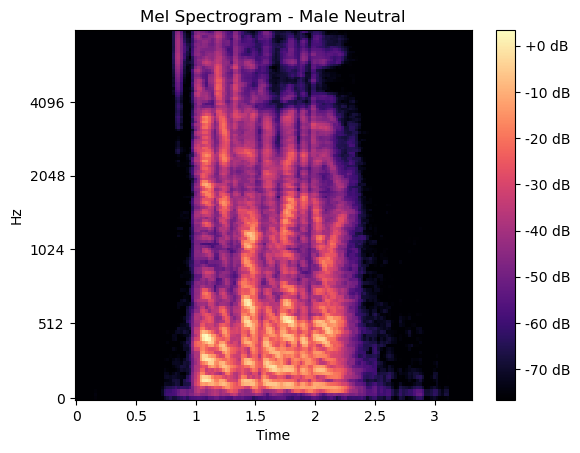

In [5]:
# CREATE LOG MEL SPECTROGRAM
spectrogram = librosa.feature.melspectrogram(y=x, sr=sr, n_mels=128,fmax=8000) 
spectrogram = librosa.power_to_db(spectrogram)

librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Male Neutral')
plt.savefig('MelSpec_MaleNeutral.png')
plt.colorbar(format='%+2.0f dB');

## Female Calm

In [6]:
# LOAD IN FILE
x, sr = librosa.load(r'C:\Users\mahan\Desktop\Code\RAVDEES\Actor_04\03-01-01-01-01-01-04.wav')

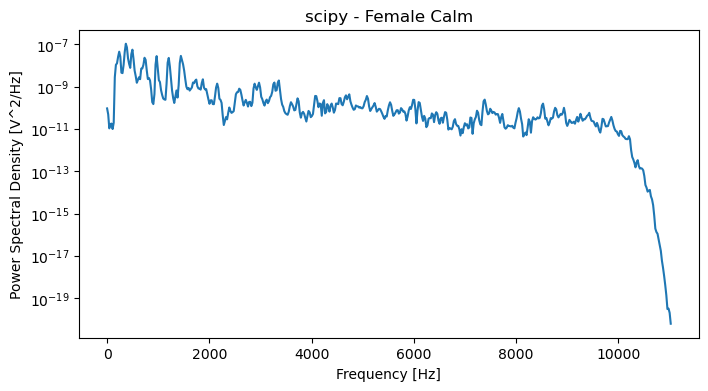

In [7]:
# DISPLAY WAVEPLOT
from scipy import signal
f, Pxx_den = signal.welch(x, sr, nperseg=1024)
plt.figure(figsize=(8, 4))
plt.semilogy(f, Pxx_den)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power Spectral Density [V^2/Hz]')

plt.title('scipy - Female Calm')
plt.savefig('scipy_FemaleCalm.png')

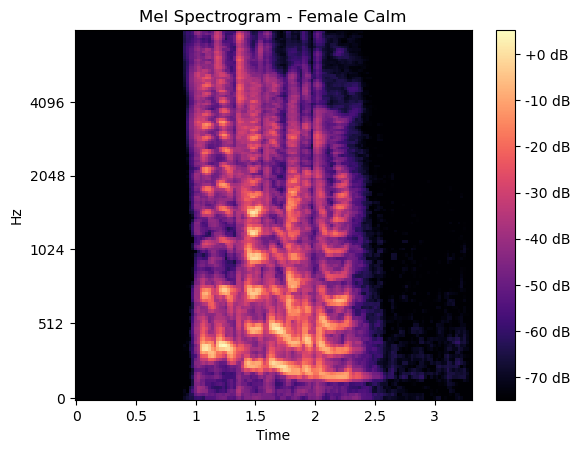

In [8]:
# CREATE LOG MEL SPECTROGRAM
spectrogram = librosa.feature.melspectrogram(y=x, sr=sr, n_mels=128,fmax=8000) 
spectrogram = librosa.power_to_db(spectrogram)

librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Female Calm')
plt.savefig('MelSpec_FemaleCalm.png')
plt.colorbar(format='%+2.0f dB');

## Male Happy

In [9]:
# LOAD FILE
x, sr = librosa.load(r'C:\Users\mahan\Desktop\Code\RAVDEES\Actor_03\03-01-03-01-01-01-03.wav')

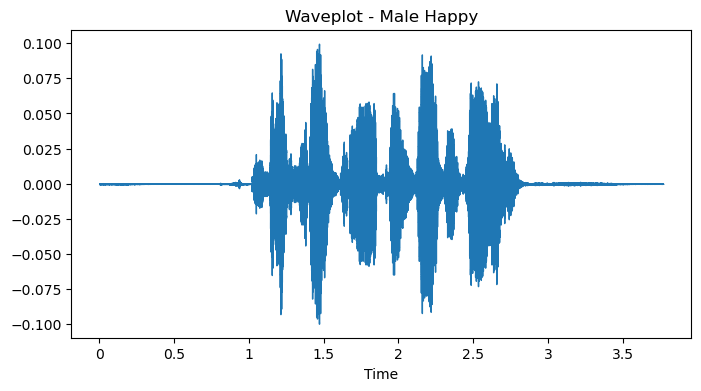

In [10]:
# DISPLAY WAVEPLOT
plt.figure(figsize=(8, 4))
librosa.display.waveshow(x, sr)
plt.title('Waveplot - Male Happy')
plt.savefig('Waveplot_MaleHappy.png')

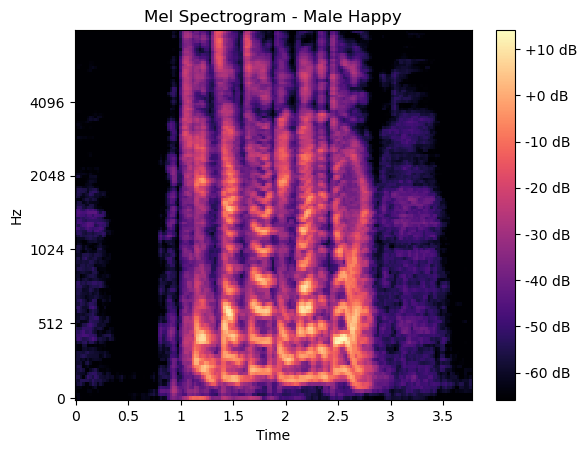

In [11]:
# CREATE LOG MEL SPECTROGRAM
x = librosa.feature.melspectrogram(y=x, sr=sr,n_mels=128,fmax=8000) 
x = librosa.power_to_db(x)

librosa.display.specshow(x, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Male Happy')
plt.savefig('MelSpec_MaleHappy.png')
plt.colorbar(format='%+2.0f dB');

## Female Sad

In [12]:
# LOAD FILE
x, sr = librosa.load(r'C:\Users\mahan\Desktop\Code\RAVDEES\Actor_04\03-01-04-01-01-01-04.wav')


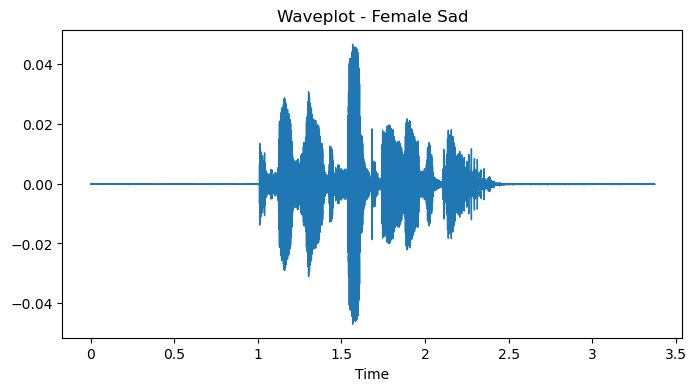

In [13]:
# DISPLAY WAVEPLOT
plt.figure(figsize=(8, 4))
librosa.display.waveshow(x, sr=sr)
plt.title('Waveplot - Female Sad')
plt.savefig('Waveplot_FemaleSad.png')

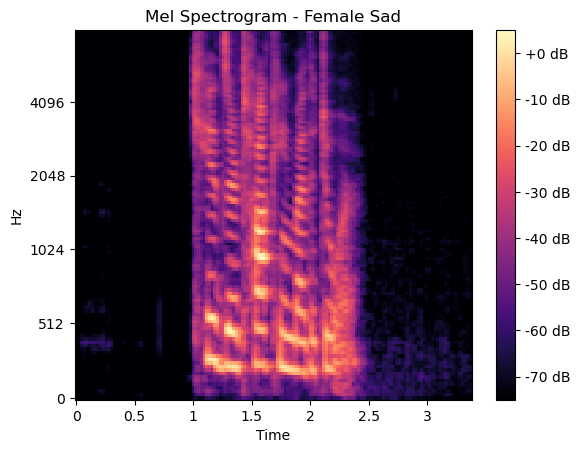

In [14]:
# DISPLAY LOG MEL SPECTROGRAM
x = librosa.feature.melspectrogram(y=x, sr=sr,n_mels=128,fmax=8000) 
y = librosa.power_to_db(x)

librosa.display.specshow(y, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Female Sad');
plt.savefig('MelSpec_FemaleSad.png')
plt.colorbar(format='%+2.0f dB');

## Male Angry

In [15]:
# LOAD FILE
x, sr = librosa.load(r'C:\Users\mahan\Desktop\Code\RAVDEES\Actor_05\03-01-05-01-01-01-05.wav')


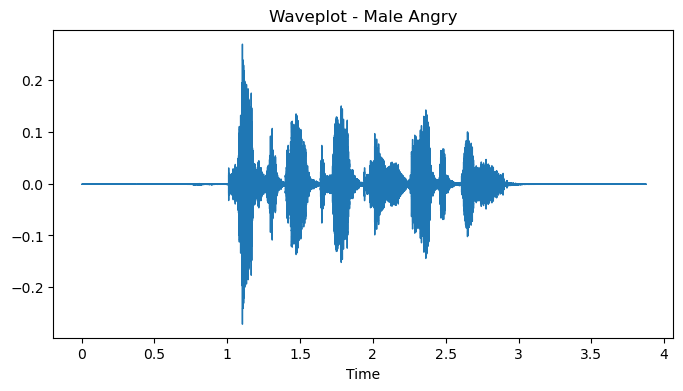

In [16]:
# DISPLAY WAVEPLOT
plt.figure(figsize=(8, 4))
librosa.display.waveshow(x, sr=sr)
plt.title('Waveplot - Male Angry')
plt.savefig('Waveplot_MaleAngry.png')

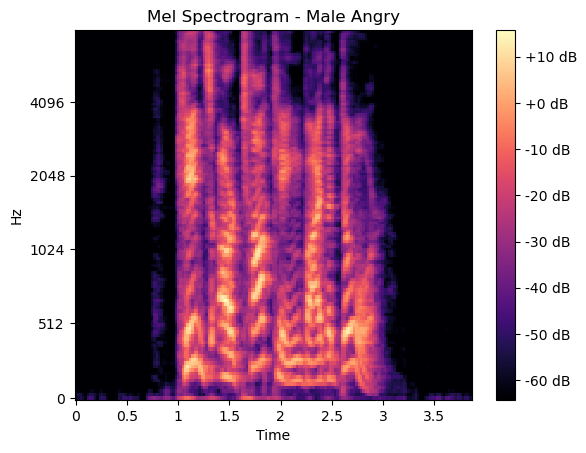

In [17]:
# DISPLAY LOG MEL SPECTROGRAM
x = librosa.feature.melspectrogram(y=x, sr=sr,n_mels=128,fmax=8000) 
y = librosa.power_to_db(x)
librosa.display.specshow(y, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Male Angry')
plt.savefig('MelSpec_MaleAngry.png')
plt.colorbar(format='%+2.0f dB');


## Female Fearful

In [18]:
# LOAD FILE
x, sr = librosa.load(r'C:\Users\mahan\Desktop\Code\RAVDEES\Actor_06\03-01-04-02-01-02-06.wav')

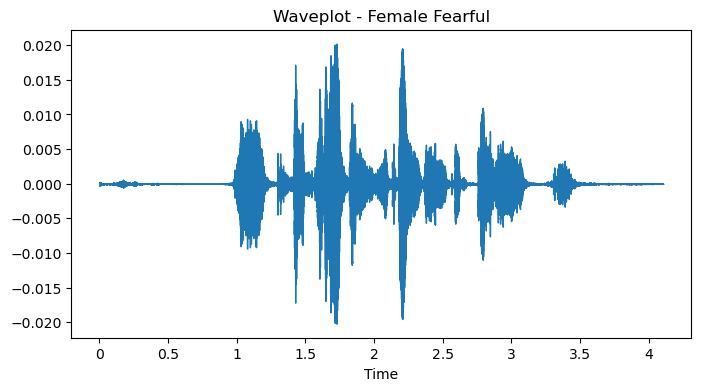

In [19]:
# DISPLAY WAVEPLOT
plt.figure(figsize=(8, 4))
librosa.display.waveshow(x, sr=sr)
plt.title('Waveplot - Female Fearful')
plt.savefig('Waveplot_FemaleFearful.png')


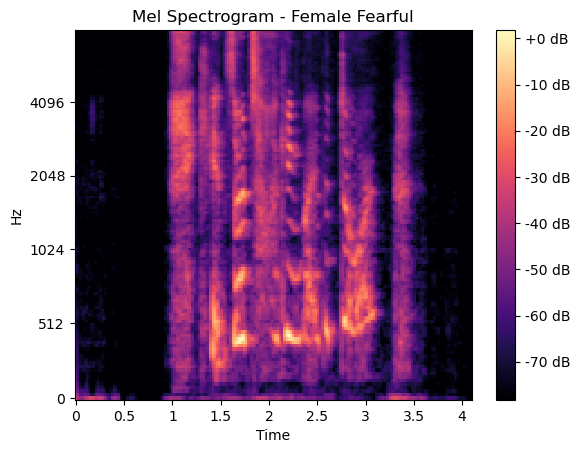

In [20]:
# DISPLAY LOG MEL SPECTROGRAM
x = librosa.feature.melspectrogram(y=x, sr=sr,n_mels=128,fmax=8000) 
y = librosa.power_to_db(x)

librosa.display.specshow(y, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Female Fearful')
plt.savefig('MelSpec_FemaleFearful.png')
plt.colorbar(format='%+2.0f dB');

## Male Disgust

In [21]:
# LOAD FILE
x, sr = librosa.load(r'C:\Users\mahan\Desktop\Code\RAVDEES\Actor_07\03-01-07-01-01-01-07.wav')

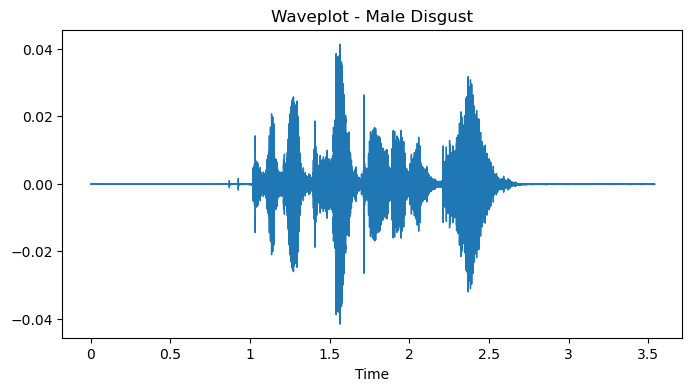

In [22]:
# DISPLAY WAVEPLOT
plt.figure(figsize=(8, 4))
librosa.display.waveshow(x, sr=sr)
plt.title('Waveplot - Male Disgust')
plt.savefig('Waveplot_MaleDisgust.png')

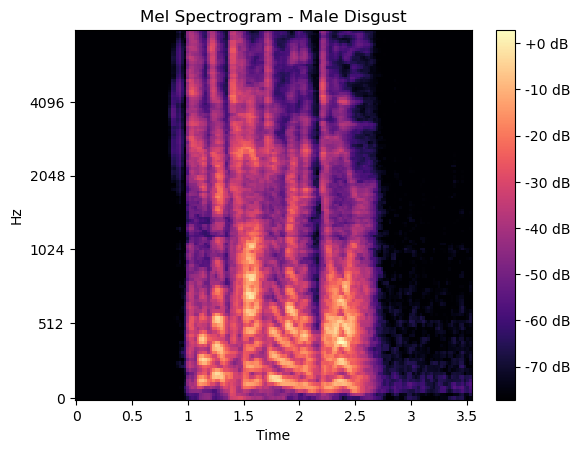

In [23]:
# DISPLAY LOG MEL SPECTROGRAM
x = librosa.feature.melspectrogram(y=x, sr=sr,n_mels=128,fmax=8000) 
y = librosa.power_to_db(x)

librosa.display.specshow(y, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Male Disgust')
plt.savefig('MelSpec_MaleDisgust.png')
plt.colorbar(format='%+2.0f dB');

## Female Surprised

In [24]:
# LOAD FILE
x, sr = librosa.load(r'C:\Users\mahan\Desktop\Code\RAVDEES\Actor_08\03-01-08-01-01-01-08.wav')

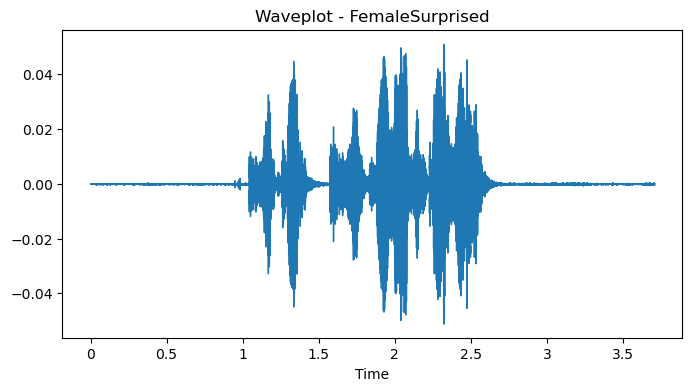

In [25]:
# DISPLAY WAVEPLOT
plt.figure(figsize=(8, 4))
librosa.display.waveshow(x, sr=sr)
plt.title('Waveplot - FemaleSurprised')
plt.savefig('Waveplot_FemaleSurprised.png')


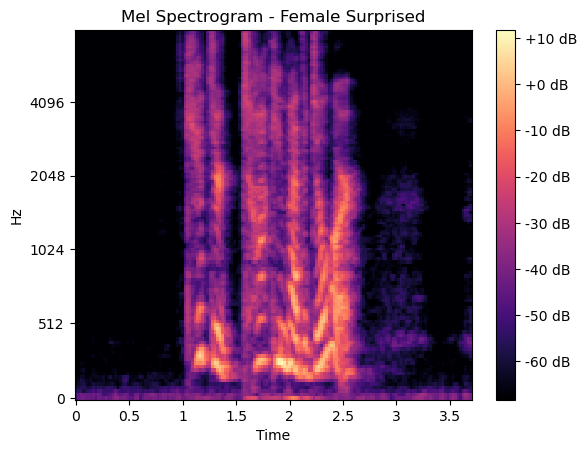

In [26]:
# DISPLAY LOG MEL SPECTROGRAM
x = librosa.feature.melspectrogram(y=x, sr=sr,n_mels=128,fmax=8000) 
y = librosa.power_to_db(x)

librosa.display.specshow(y, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Female Surprised')
plt.savefig('MelSpec_FemaleSurprised.png')
plt.colorbar(format='%+2.0f dB');

# Data Preprocessing

## Labeling Audio Files

In [27]:
import pandas as pd
EMOTIONS = {1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 0:'surprise'} # surprise je promenjen sa 8 na 0
DATA_PATH =  r'C:\Users\mahan\Desktop\Code\RAVDEES'
SAMPLE_RATE = 48000

data = pd.DataFrame(columns=['Emotion', 'Emotion intensity', 'Gender','Path'])
for dirname, _, filenames in os.walk(DATA_PATH):
    for filename in filenames:
        file_path = os.path.join('/kaggle/input/',dirname, filename)
        identifiers = filename.split('.')[0].split('-')
        emotion = (int(identifiers[2]))
        if emotion == 8: # promeni surprise sa 8 na 0
            emotion = 0
        if int(identifiers[3]) == 1:
            emotion_intensity = 'normal' 
        else:
            emotion_intensity = 'strong'
        if int(identifiers[6])%2 == 0:
            gender = 'female'
        else:
            gender = 'male'
        
        data = data.append({"Emotion": emotion,
                            "Emotion intensity": emotion_intensity,
                            "Gender": gender,
                            "Path": file_path
                             },
                             ignore_index = True
                          )

In [28]:
data = r'C:\Users\mahan\Desktop\Code\RAVDEES'
print("number of files is {}".format(len(data)))

number of files is 35


In [29]:
audio = r'C:\Users\mahan\Desktop\Code\RAVDEES'
actor_folders = os.listdir(audio) #list files in audio directory
actor_folders.sort() 
actor_folders[0:10]

['Actor_01',
 'Actor_02',
 'Actor_03',
 'Actor_04',
 'Actor_05',
 'Actor_06',
 'Actor_07',
 'Actor_08',
 'Actor_09',
 'Actor_10']

Text(0, 0.5, 'Number of examples')

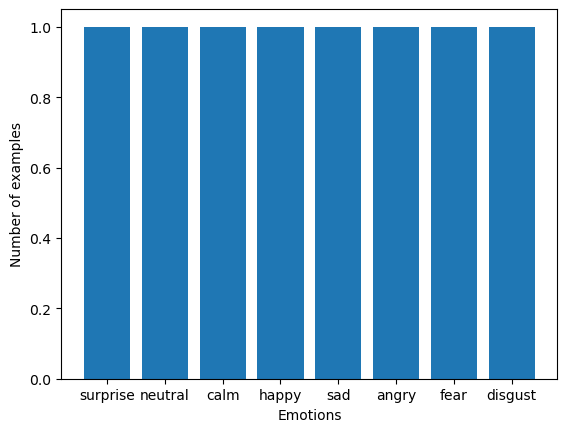

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(x=range(8), height=pd.Series(data[10]).value_counts())
ax.set_xticks(ticks=range(8))
ax.set_xticklabels([EMOTIONS[i] for i in range(8)],fontsize=10)
ax.set_xlabel('Emotions')
ax.set_ylabel('Number of examples')

In [31]:
#audio = "/Users/murielkosaka/Desktop/capstone_project/audio/audio_speech_actors_01-24/"
audio = r'C:\Users\mahan\Desktop\Code\\RAVDEES\\'
emotion = []
gender = []
actor = []
file_path = []
for i in actor_folders:
    filename = os.listdir(audio + i) #iterate over Actor folders
    for f in filename: # go through files in Actor folder
        part = f.split('.')[0].split('-')
        emotion.append(int(part[2]))
        actor.append(int(part[6]))
        bg = int(part[6])
        if bg%2 == 0:
            bg = "female"
        else:
            bg = "male"
        gender.append(bg)
        file_path.append(audio + i + '/' + f)

In [32]:
# PUT EXTRACTED LABELS WITH FILEPATH INTO DATAFRAME
audio_df = pd.DataFrame(emotion)
audio_df = audio_df.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
audio_df = pd.concat([pd.DataFrame(gender),audio_df,pd.DataFrame(actor)],axis=1)
audio_df.columns = ['gender','emotion','actor']
audio_df = pd.concat([audio_df,pd.DataFrame(file_path, columns = ['path'])],axis=1)
audio_df

,gender,emotion,actor,path
0,male,neutral,1,C:\Users\mahan\Desktop\Code\\RAVDEES\\Actor_01...
1,male,neutral,1,C:\Users\mahan\Desktop\Code\\RAVDEES\\Actor_01...
2,male,neutral,1,C:\Users\mahan\Desktop\Code\\RAVDEES\\Actor_01...
3,male,neutral,1,C:\Users\mahan\Desktop\Code\\RAVDEES\\Actor_01...
4,male,calm,1,C:\Users\mahan\Desktop\Code\\RAVDEES\\Actor_01...
...,...,...,...,...
595,female,surprise,10,C:\Users\mahan\Desktop\Code\\RAVDEES\\Actor_10...
596,female,surprise,10,C:\Users\mahan\Desktop\Code\\RAVDEES\\Actor_10...
597,female,surprise,10,C:\Users\mahan\Desktop\Code\\RAVDEES\\Actor_10...
598,female,surprise,10,C:\Users\mahan\Desktop\Code\\RAVDEES\\Actor_10...


In [33]:
# ENSURE GENDER,EMOTION, AND ACTOR COLUMN VALUES ARE CORRECT
pd.set_option('display.max_colwidth', -1)
audio_df.sample(10)

,gender,emotion,actor,path
196,female,happy,4,C:\Users\mahan\Desktop\Code\\RAVDEES\\Actor_04/03-01-03-02-01-01-04.wav
464,female,disgust,8,C:\Users\mahan\Desktop\Code\\RAVDEES\\Actor_08/03-01-07-01-01-01-08.wav
106,female,disgust,2,C:\Users\mahan\Desktop\Code\\RAVDEES\\Actor_02/03-01-07-01-02-01-02.wav
297,male,surprise,5,C:\Users\mahan\Desktop\Code\\RAVDEES\\Actor_05/03-01-08-02-01-02-05.wav
358,female,surprise,6,C:\Users\mahan\Desktop\Code\\RAVDEES\\Actor_06/03-01-08-02-02-01-06.wav
11,male,calm,1,C:\Users\mahan\Desktop\Code\\RAVDEES\\Actor_01/03-01-02-02-02-02-01.wav
30,male,angry,1,C:\Users\mahan\Desktop\Code\\RAVDEES\\Actor_01/03-01-05-01-02-01-01.wav
435,female,happy,8,C:\Users\mahan\Desktop\Code\\RAVDEES\\Actor_08/03-01-03-01-02-02-08.wav
62,female,neutral,2,C:\Users\mahan\Desktop\Code\\RAVDEES\\Actor_02/03-01-01-01-02-01-02.wav
382,male,sad,7,C:\Users\mahan\Desktop\Code\\RAVDEES\\Actor_07/03-01-04-01-02-01-07.wav


<AxesSubplot:>

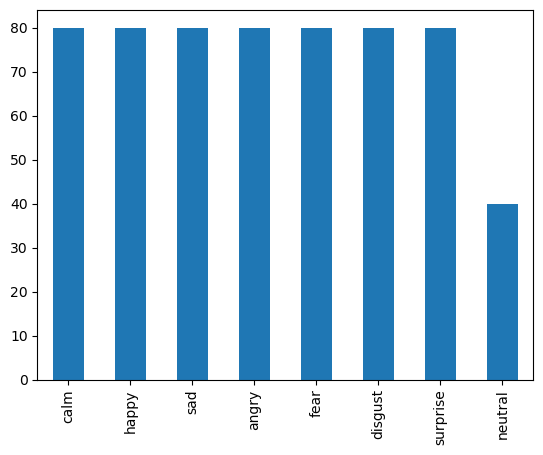

In [34]:
# LOOK AT DISTRIBUTION OF CLASSES
audio_df.emotion.value_counts().plot(kind='bar')

In [35]:
# EXPORT TO CSV
audio_df.to_csv('Uploads/audio.csv')

## Feature Extraction

In [36]:
# ITERATE OVER ALL AUDIO FILES AND EXTRACT LOG MEL SPECTROGRAM MEAN VALUES INTO DF FOR MODELING 
df = pd.DataFrame(columns=['mel_spectrogram'])

counter=0

for index,path in enumerate(audio_df.path):
    X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=3,sr=44100,offset=0.5)
    
    #get the mel-scaled spectrogram (ransform both the y-axis (frequency) to log scale, and the “color” axis (amplitude) to Decibels, which is kinda the log scale of amplitudes.)
    spectrogram = librosa.feature.melspectrogram(y=X, sr=sample_rate, n_mels=128,fmax=8000) 
    db_spec = librosa.power_to_db(spectrogram)
    #temporally average spectrogram
    log_spectrogram = np.mean(db_spec, axis = 0)
        
    # Mel-frequency cepstral coefficients (MFCCs)
    mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
    mfcc=np.mean(mfcc,axis=0)
    
    # compute chroma energy (pertains to 12 different pitch classes)
#     chroma = librosa.feature.chroma_stft(y=X, sr=sample_rate)
#     chroma = np.mean(chroma, axis = 0)

    # compute spectral contrast
#     contrast = librosa.feature.spectral_contrast(y=X, sr=sample_rate)
#     contrast = np.mean(contrast, axis= 0)

    # compute zero-crossing-rate (zcr:the zcr is the rate of sign changes along a signal i.e.m the rate at 
#     which the signal changes from positive to negative or back - separation of voiced andunvoiced speech.)
#     zcr = librosa.feature.zero_crossing_rate(y=X)
#     zcr = np.mean(zcr, axis= 0)
    
    df.loc[counter] = [log_spectrogram]
    counter=counter+1   

print(len(df))
df.head()

600


,mel_spectrogram
0,"[-76.38517, -76.38517, -76.38517, -76.38517, -76.38517, -76.38517, -76.38517, -76.38517, -76.38517, -76.38517, -76.38517, -76.38517, -76.38517, -76.38517, -76.38517, -76.38517, -76.36786, -76.37246, -76.38517, -76.38517, -76.17431, -75.719505, -75.94193, -75.64302, -75.90935, -75.831375, -75.751114, -74.78015, -72.83191, -71.263756, -66.52322, -66.22396, -70.02076, -72.22921, -72.31408, -73.10347, -73.701065, -74.247696, -72.630394, -70.08893, -71.00703, -71.96019, -64.493034, -45.909115, -40.03265, -41.116196, -43.53594, -40.619087, -35.054295, -32.517746, -32.09286, -32.51803, -33.53733, -33.267906, -35.378788, -40.179214, -42.37324, -43.332733, -42.33963, -40.890015, -37.123814, -35.46733, -33.28553, -32.946808, -32.99233, -33.490063, -35.945507, -41.89657, -47.815556, -50.323345, -45.50298, -38.28953, -38.66705, -41.103416, -41.81687, -42.414722, -41.487434, -39.02261, -35.519184, -33.715645, -33.540783, -34.01719, -34.092537, -32.436966, -31.850922, -33.650417, -38.193787, -42.978214, -45.402683, -45.206203, -44.58686, -45.937107, -45.795887, -40.709045, -37.87307, -38.022858, -38.164314, -39.509556, -41.684135, -42.94215, ...]"
1,"[-75.48293, -75.4404, -75.554375, -75.20429, -75.23087, -75.31972, -75.65414, -75.720375, -75.720375, -75.720375, -75.720375, -75.720375, -75.55636, -75.1184, -75.0596, -75.37099, -75.391594, -75.65218, -75.720375, -75.720375, -75.54746, -75.301704, -75.144135, -75.150276, -75.40712, -72.989395, -65.36437, -66.21635, -71.88308, -61.77353, -55.71276, -54.201763, -59.008724, -65.38103, -71.74732, -73.44525, -74.10868, -75.11392, -75.422935, -73.35708, -71.12269, -71.67145, -72.885124, -57.992264, -46.606167, -42.765457, -42.77682, -44.442326, -43.676636, -39.06736, -35.260796, -33.520035, -32.133297, -31.929964, -32.559666, -35.611877, -41.081226, -44.21871, -45.059032, -44.434967, -43.6203, -41.230057, -38.099014, -35.112717, -33.440674, -33.15926, -33.61406, -33.653507, -33.701817, -36.430912, -42.56046, -47.216526, -50.08694, -51.846832, -41.40661, -36.932133, -37.993782, -39.502655, -40.629604, -38.977577, -37.318096, -38.02609, -36.580303, -32.02303, -30.128885, -30.4522, -30.167246, -29.611923, -31.499462, -37.14612, -43.22088, -46.133022, -44.403244, -42.880116, -44.656788, -46.631077, -43.144543, -40.014843, -38.662434, -37.18039, ...]"
2,"[-75.15079, -75.15079, -75.15079, -75.15079, -75.15079, -75.15079, -75.15079, -75.13967, -75.07232, -75.15079, -75.15079, -75.15079, -75.15079, -75.09946, -75.15079, -75.15079, -75.15079, -75.10913, -75.0942, -75.15079, -74.92831, -74.15182, -74.19854, -74.5156, -75.11962, -75.10407, -75.13173, -75.15079, -75.15079, -75.149956, -75.15079, -75.15079, -75.15079, -75.15079, -75.15079, -75.069115, -74.12111, -73.6178, -74.536125, -74.174065, -73.56252, -72.485245, -73.08493, -49.680977, -39.80165, -36.83088, -35.704613, -34.180256, -31.863138, -30.693201, -30.325674, -30.965343, -30.824118, -30.033844, -28.69082, -28.169176, -28.13898, -29.08207, -30.787987, -32.99949, -37.513935, -41.93026, -44.938816, -44.383423, -41.121216, -40.154804, -39.989162, -39.938236, -41.253056, -40.453785, -37.339134, -35.710888, -36.269848, -36.071182, -36.352654, -36.93645, -38.03055, -39.9, -40.52588, -41.243824, -41.382935, -40.334106, -38.54372, -39.558132, -40.66751, -37.1995, -32.581936, -32.73879, -33.55274, -37.30237, -43.40366, -39.87777, -35.74474, -34.765434, -34.003635, -33.998913, -34.424145, -35.477554, -38.35184, -41.040623, ...]"
3,"[-75.268524, -75.268524, -75.268524, -75.268524, -75.268524, -75.268524, -75.268524, -75.268524, -75.268524, -75.268524, -75.268524, -75.268524, -75.268524, -75.268524, -75.24309, -75.268524, -75.268524, -75.268524, -75.268524, -75.268524, -75.268524, -75.24536, -75.04578, -74.99178, -75.19998, -75.268524, -75.268524, -75.268524, -75.268524, -75.268524, -75.268524, -75.268524, -75.268524, -75.268524, -75.268524, -74.34868, -73.92553, -73.563644, -73.27902, -72.94665, -72.36577, -72.7718, -62.660824, -41.765606, -

In [37]:
# TURN ARRAY INTO LIST AND JOIN WITH AUDIO_DF TO GET CORRESPONDING EMOTION LABELS
df_combined = pd.concat([audio_df,pd.DataFrame(df['mel_spectrogram'].values.tolist())],axis=1)
df_combined = df_combined.fillna(0)

In [38]:
# DROP PATH COLUMN FOR MODELING
df_combined.drop(columns='path',inplace=True)

In [39]:
# CHECK TOP 5 ROWS
df_combined.head()

,gender,emotion,actor,0,1,2,3,4,5,6,...,249,250,251,252,253,254,255,256,257,258
0,male,neutral,1,-76.385170,-76.385170,-76.385170,-76.385170,-76.385170,-76.385170,-76.385170,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,male,neutral,1,-75.482933,-75.440399,-75.554375,-75.204292,-75.230873,-75.319717,-75.654137,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,male,neutral,1,-75.150787,-75.150787,-75.150787,-75.150787,-75.150787,-75.150787,-75.150787,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,male,neutral,1,-75.268524,-75.268524,-75.268524,-75.268524,-75.268524,-75.268524,-75.268524,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,male,calm,1,-80.147774,-80.147774,-80.147774,-80.147774,-80.147774,-80.147774,-80.147774,...,-80.147774,-80.147774,-80.122353,-79.998413,-80.119652,-80.147774,-80.130814,-80.015106,-80.147774,-80.147774


# Prepping Data for Modeling

In [40]:
# TRAIN TEST SPLIT DATA
train,test = train_test_split(df_combined, test_size=0.2, random_state=0,
                               stratify=df_combined[['emotion','gender','actor']])

In [41]:
X_train = train.iloc[:, 3:]
y_train = train.iloc[:,:2].drop(columns=['gender'])
print(X_train.shape)

(480, 259)


In [42]:
X_test = test.iloc[:,3:]
y_test = test.iloc[:,:2].drop(columns=['gender'])
print(X_test.shape)

(120, 259)


# Data Preprocessing

In [43]:
# NORMALIZE DATA
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
X_train = (X_train - mean)/std
X_test = (X_test - mean)/std

In [44]:
# TURN DATA INTO ARRAYS FOR KERAS
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [45]:
# ONE HOT ENCODE THE TARGET
# CNN REQUIRES INPUT AND OUTPUT ARE NUMBERS
lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))

print(y_test[0:10])

[[0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0.]]


In [46]:
print(lb.classes_)

['angry' 'calm' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprise']


In [47]:
# RESHAPE DATA TO INCLUDE 3D TENSOR 
X_train = X_train[:,:,np.newaxis]
X_test = X_test[:,:,np.newaxis]

X_train.shape

(480, 259, 1)

## Base Model

In [48]:
X_train.shape

(480, 259, 1)

In [49]:
X_test.shape

(120, 259, 1)

In [50]:
import numpy as np
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="stratified")
dummy_clf.fit(X_train, y_train)
DummyClassifier(strategy='stratified')
dummy_clf.predict(X_test)
dummy_clf.score(X_test, y_test)


0.016666666666666666

In [51]:
#from sklearn import tree

#clf = tree.DecisionTreeClassifier()
#clf = clf.fit(X_train, y_train)
#clf.predict(X_test)
#clf.score(X_test, y_test)


## Initial Model

In [52]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model

#BUILD 1D CNN LAYERS
model = tf.keras.Sequential()
model.add(layers.Conv1D(64, kernel_size=(10), activation='relu', input_shape=(X_train.shape[1],1)))
model.add(layers.Conv1D(128, kernel_size=(10),activation='relu',kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(layers.MaxPooling1D(pool_size=(8)))
model.add(layers.Dropout(0.4))
model.add(layers.Conv1D(128, kernel_size=(10),activation='relu'))
model.add(layers.MaxPooling1D(pool_size=(8)))
model.add(layers.Dropout(0.4))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(8, activation='sigmoid'))
opt = keras.optimizers.Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 250, 64)           704       
                                                                 
 conv1d_1 (Conv1D)           (None, 241, 128)          82048     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 30, 128)          0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 30, 128)           0         
                                                                 
 conv1d_2 (Conv1D)           (None, 21, 128)           163968    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 2, 128)           0         
 1D)                                                    

In [53]:
import tensorflow.keras as keras

# FIT MODEL AND USE CHECKPOINT TO SAVE BEST MODEL
checkpoint = ModelCheckpoint("best_initial_model.hdf5", monitor='val_accuracy', verbose=1,
    save_best_only=True, mode='max', period=1, save_weights_only=True)

model_history=model.fit(X_train, y_train,batch_size=32, epochs=40, validation_data=(X_test, y_test),callbacks=[checkpoint])



Epoch 1/40
15/15 [==============================] - ETA: 0s - loss: 2.7465 - accuracy: 0.1667
Epoch 1: val_accuracy improved from -inf to 0.22500, saving model to best_initial_model.hdf5
15/15 [==============================] - 5s 163ms/step - loss: 2.7465 - accuracy: 0.1667 - val_loss: 2.4472 - val_accuracy: 0.2250
Epoch 2/40
15/15 [==============================] - ETA: 0s - loss: 2.3941 - accuracy: 0.2375
Epoch 2: val_accuracy improved from 0.22500 to 0.30000, saving model to best_initial_model.hdf5
15/15 [==============================] - 1s 77ms/step - loss: 2.3941 - accuracy: 0.2375 - val_loss: 2.2282 - val_accuracy: 0.3000
Epoch 3/40
15/15 [==============================] - ETA: 0s - loss: 2.2129 - accuracy: 0.2458
Epoch 3: val_accuracy improved from 0.30000 to 0.33333, saving model to best_initial_model.hdf5
15/15 [==============================] - 1s 80ms/step - loss: 2.2129 - accuracy: 0.2458 - val_loss: 2.0625 - val_accuracy: 0.3333
Epoch 4/40
15/15 [========================

15/15 [==============================] - 1s 60ms/step - loss: 1.3010 - accuracy: 0.5104 - val_loss: 1.3699 - val_accuracy: 0.5333
Epoch 29/40
14/15 [===========================>..] - ETA: 0s - loss: 1.2705 - accuracy: 0.5000
Epoch 29: val_accuracy improved from 0.53333 to 0.54167, saving model to best_initial_model.hdf5
15/15 [==============================] - 1s 59ms/step - loss: 1.2513 - accuracy: 0.5042 - val_loss: 1.3308 - val_accuracy: 0.5417
Epoch 30/40
15/15 [==============================] - ETA: 0s - loss: 1.2239 - accuracy: 0.5646
Epoch 30: val_accuracy did not improve from 0.54167
15/15 [==============================] - 1s 61ms/step - loss: 1.2239 - accuracy: 0.5646 - val_loss: 1.3464 - val_accuracy: 0.5167
Epoch 31/40
15/15 [==============================] - ETA: 0s - loss: 1.2427 - accuracy: 0.5604
Epoch 31: val_accuracy improved from 0.54167 to 0.55000, saving model to best_initial_model.hdf5
15/15 [==============================] - 1s 84ms/step - loss: 1.2427 - accuracy

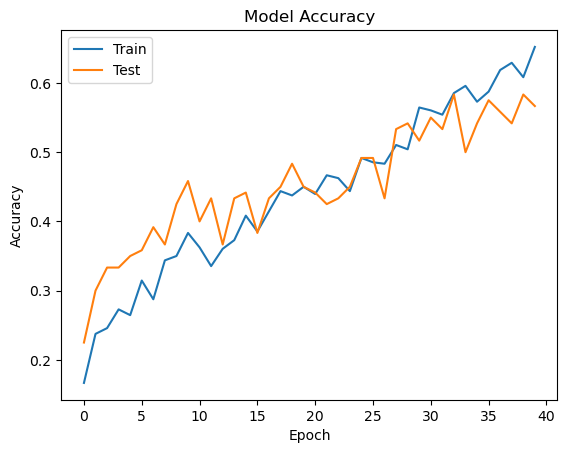

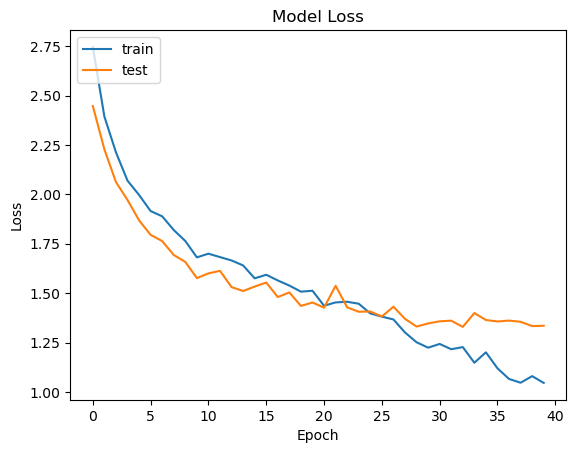

In [54]:
# PLOT MODEL HISTORY OF ACCURACY AND LOSS OVER EPOCHS
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('Initial_Model_Accuracy.png')
plt.show()
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('Initial_Model_loss.png')
plt.show()

## Post-Model Analysis

In [55]:
# PRINT LOSS AND ACCURACY PERCENTAGE ON TEST SET
print("Loss of the model is - " , model.evaluate(X_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(X_test,y_test)[1]*100 , "%")

4/4 [==============================] - 0s 21ms/step - loss: 1.3350 - accuracy: 0.5667
Loss of the model is -  1.3349742889404297
4/4 [==============================] - 0s 26ms/step - loss: 1.3350 - accuracy: 0.5667
Accuracy of the model is -  56.66666626930237 %


In [58]:
# PREDICTIONS
predictions = model.predict(X_test)
predictions=predictions.argmax(axis=1)
predictions = predictions.astype(int).flatten()
predictions = (lb.inverse_transform((predictions)))
predictions = pd.DataFrame({'Predicted Values': predictions})

# ACTUAL LABELS
actual=y_test.argmax(axis=1)
actual = actual.astype(int).flatten()
actual = (lb.inverse_transform((actual)))
actual = pd.DataFrame({'Actual Values': actual})

# COMBINE BOTH 
finaldf = actual.join(predictions)
finaldf[140:150]

4/4 [==============================] - 0s 15ms/step


,Actual Values,Predicted Values


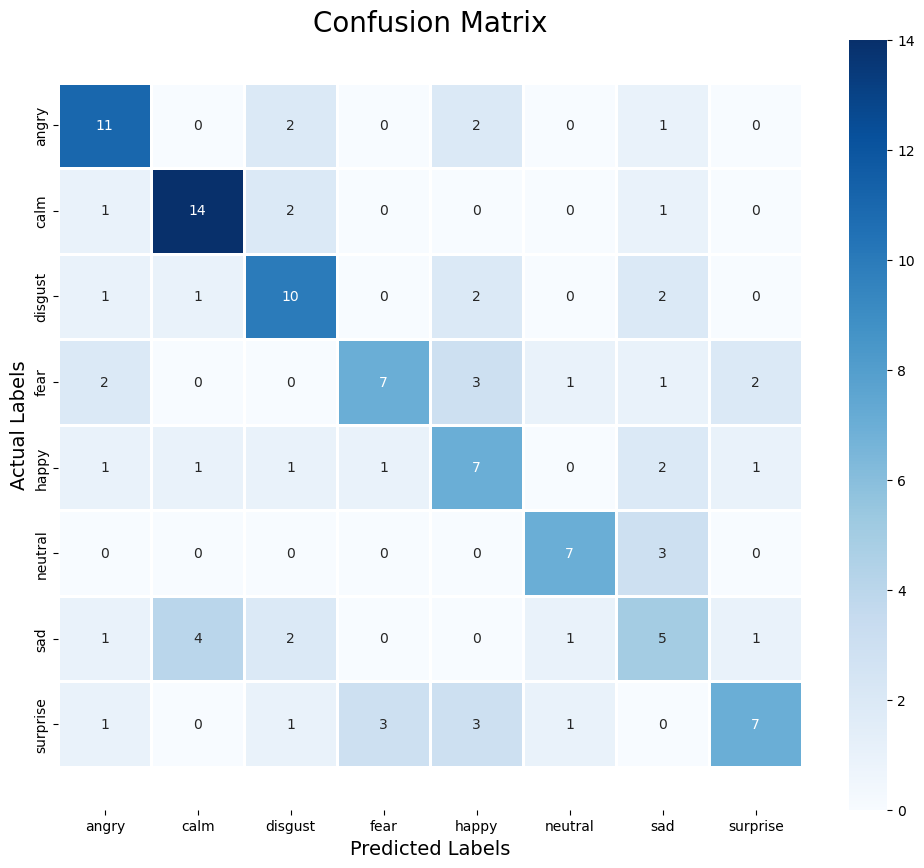

In [59]:
# CREATE CONFUSION MATRIX OF ACTUAL VS. PREDICTION 
cm = confusion_matrix(actual, predictions)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in lb.classes_] , columns = [i for i in lb.classes_])
ax = sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.savefig('Initial_Model_Confusion_Matrix.png')
plt.show()

In [60]:
print(classification_report(actual, predictions, target_names = ['angry','calm','disgust','fear','happy','neutral','sad','surprise']))

              precision    recall  f1-score   support

       angry       0.61      0.69      0.65        16
        calm       0.70      0.78      0.74        18
     disgust       0.56      0.62      0.59        16
        fear       0.64      0.44      0.52        16
       happy       0.41      0.50      0.45        14
     neutral       0.70      0.70      0.70        10
         sad       0.33      0.36      0.34        14
    surprise       0.64      0.44      0.52        16

    accuracy                           0.57       120
   macro avg       0.57      0.57      0.56       120
weighted avg       0.58      0.57      0.56       120



## Hyperparameter Tuning

In [61]:
# TRAIN TEST SPLIT DATA
train,test = train_test_split(df_combined, test_size=0.2, random_state=0,
                               stratify=df_combined[['gender','actor']])

X_train = train.iloc[:, 3:]
y_train = train.iloc[:,:2].drop(columns=['gender'])
print(X_train.shape)

X_test = test.iloc[:,3:]
y_test = test.iloc[:,:2].drop(columns=['gender'])
print(X_test.shape)

(480, 259)
(120, 259)


In [62]:
# NORMALIZE DATA
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
X_train = (X_train - mean)/std
X_test = (X_test - mean)/std

In [63]:
# TURN DATA INTO ARRAYS FOR KERAS
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [64]:
# RESHAPE TO INCLUDE 3D TENSOR
X_train = X_train[:,:,np.newaxis]
X_test = X_test[:,:,np.newaxis]

In [65]:
from keras.utils import np_utils, to_categorical

lb = LabelEncoder()

y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

In [66]:
# CREATE FUNCTION FOR KERAS CLASSIFIER
opt = keras.optimizers.Adam(lr=0.0001)
def make_classifier(optimizer=opt):
    #BUILD CNN MODEL
    model = Sequential()
    model.add(layers.Conv1D(64, kernel_size=(10), activation='relu', input_shape=(X_train.shape[1],1)))
    model.add(layers.Conv1D(128, kernel_size=(10),activation='relu',kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
    model.add(layers.MaxPooling1D(pool_size=(8)))
    model.add(layers.Dropout(0.4))
    model.add(layers.Conv1D(128, kernel_size=(10),activation='relu'))
    model.add(layers.MaxPooling1D(pool_size=(8)))
    model.add(layers.Dropout(0.4))
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.4))
    model.add(layers.Dense(8, activation='sigmoid'))
    opt = keras.optimizers.Adam(lr=0.0001)
    model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
    return model


In [67]:
y_trainHot=np.argmax(y_train, axis=1)

In [68]:
# GRID SEARCH PARAMETERS TO FIND BEST VALUES
classifier = KerasClassifier(build_fn = make_classifier)
params = {
    'batch_size': [30, 32, 34],
    'nb_epoch': [25, 50, 75],
    'optimizer':['adam','SGD']}

grid_search = GridSearchCV(estimator=classifier,
                           param_grid=params,
                           scoring='accuracy',
                           cv=5)

grid_search = grid_search.fit(X_train,y_trainHot)

3/3 [==============================] - 0s 15ms/step


15/15 [==============================] - 3s 54ms/step - loss: 2.9532 - accuracy: 0.1229


In [69]:
grid_search.best_params_

{'batch_size': 34, 'nb_epoch': 75, 'optimizer': 'SGD'}

In [70]:
grid_search.best_score_

0.24375